In [33]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Loading data
df = pd.read_csv('Google-PlayStore.csv', parse_dates=['Released', 'Last Updated', 'Scraped Time'])

Getting to know our data

In [35]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

In [37]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Released,Last Updated,Scraped Time
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06,2241891,2312944,2312944
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01,2018-08-29 21:30:30.997313024,2019-12-05 18:40:39.280847872,2021-06-16 05:19:35.329710080
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010-01-28 00:00:00,2009-02-09 00:00:00,2021-06-15 20:19:35
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00,2017-07-02 00:00:00,2019-04-18 00:00:00,2021-06-16 01:01:59
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00,2019-03-21 00:00:00,2020-05-16 00:00:00,2021-06-16 05:20:05
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00,2020-04-16 00:00:00,2021-02-05 00:00:00,2021-06-16 09:38:38
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,2021-06-16 00:00:00,2021-06-16 00:00:00,2021-06-16 15:10:42
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00,NaN,NaN,NaN


Data Cleaning

Checking for duplicates:

In [38]:
# Seeing
duplicates = df.duplicated(subset=['App Name', 'App Id'])
df[duplicates]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


Handling missing values and converting columns to appropriate data types:

In [39]:
df.isnull().sum()

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [40]:
# App Name
df.dropna(subset=['App Name'], inplace=True)

# Rating column
# Filling missing values with the median of the column
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Rating count column
# Filling missing values with the median of the column
df['Rating Count'].fillna(df['Rating Count'].median(), inplace=True)

# Installs column
# Filling missing values with the most frequent value of the column
df['Installs'].fillna(df['Installs'].mode()[0], inplace=True)
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Minimum Installs column
df['Minimum Installs'].fillna(df['Minimum Installs'].median(), inplace=True)
df['Minimum Installs'] = df['Minimum Installs'].astype(int)

# Currency column
# Filling missing values with the most frequent value of the column
df['Currency'].fillna(df['Currency'].mode()[0], inplace=True)

# Size column
# Function to clean and convert sizes to megabytes (MB)
def clean_convert_size(size_str):
    if isinstance(size_str, str):
        if size_str.endswith('M'):
            return float(size_str[:-1])  # Remove 'M' and convert to float
        elif size_str.endswith('G'):
            return float(size_str[:-1]) * 1024  # Convert gigabytes to megabytes
        elif size_str.endswith('k'):
            return float(size_str[:-1]) / 1024  # Convert kilobytes to megabytes
        else:
            return None  # Handle cases like 'Varies with device' or invalid data
    else:
        return None  # Handle non-string or already converted values

# Clean and convert 'Size' column
df['Size'] = df['Size'].str.replace(',', '')
df['Size'] = df['Size'].apply(clean_convert_size)
df['Size'].fillna(df['Size'].median(), inplace=True)

# Minimum Android
df['Minimum Android'].fillna(df['Minimum Android'].mode()[0], inplace=True)

# Released
df.dropna(subset=['Released'], inplace=True)

# Dropping the columns we don't need
df = df.drop(['Developer Id', 'Developer Email', 'Developer Website', 'Privacy Policy'], axis=1)

/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_1995/711287070.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_1995/711287070.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [41]:
df.isnull().sum()

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64

In [42]:
df.to_csv('Play-store-clean.csv', index=False)

Market Analysis:
•	What are the most popular app categories based on the number of installations?

In [43]:
# Category column
print(df['Category'].nunique())
df['Category'].value_counts()

48


Category
Education                  236116
Music & Audio              153452
Tools                      138334
Business                   136550
Entertainment              135485
Books & Reference          115537
Lifestyle                  115340
Personalization             88860
Health & Fitness            80723
Productivity                75275
Shopping                    71574
Food & Drink                71024
Travel & Local              64882
Finance                     62126
Arcade                      52489
Puzzle                      49915
Casual                      48873
Communication               46145
Sports                      45814
Social                      43134
News & Magazines            41873
Photography                 35163
Medical                     30125
Action                      26626
Maps & Navigation           25052
Adventure                   22540
Simulation                  22476
Educational                 20736
Art & Design                18310
Auto 

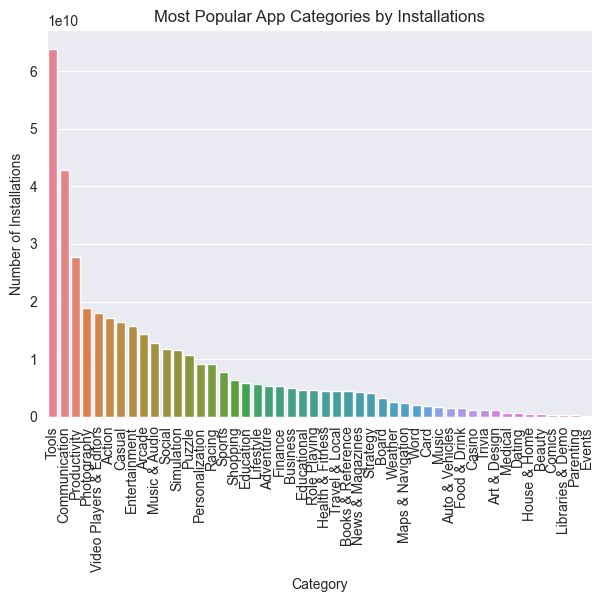

In [44]:
pop_cats = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=pop_cats, x='Category', y='Installs', hue='Category')
plt.ylabel('Number of Installations')
plt.xlabel('Category')
plt.title('Most Popular App Categories by Installations')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

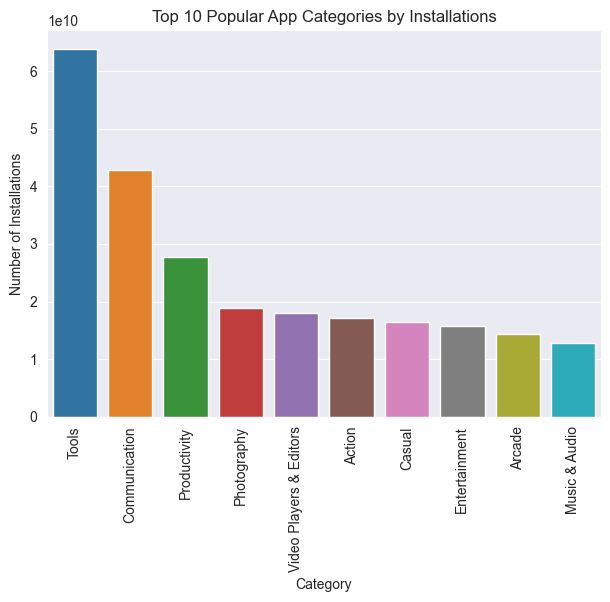

In [45]:
sns.barplot(data=pop_cats.head(10), x='Category', y='Installs', hue='Category')
plt.ylabel('Number of Installations')
plt.xlabel('Category')
plt.title('Top 10 Popular App Categories by Installations')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

•	Which categories have the highest average ratings?

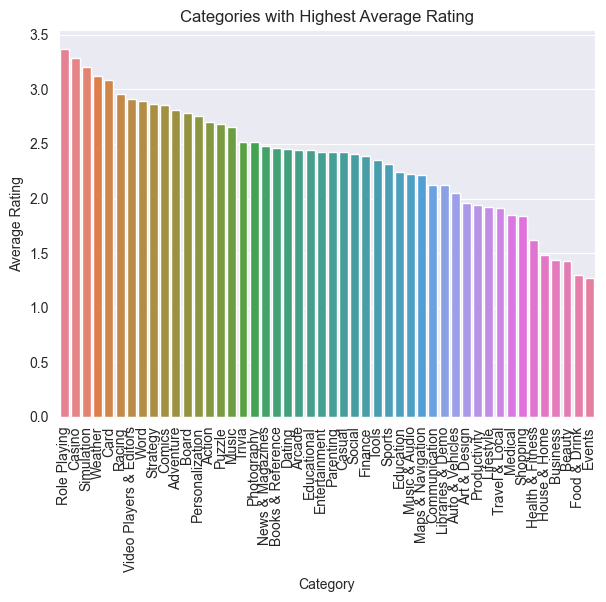

In [46]:
high_rate_cats = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=high_rate_cats, x='Category', y='Rating', hue='Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.title('Categories with Highest Average Rating')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

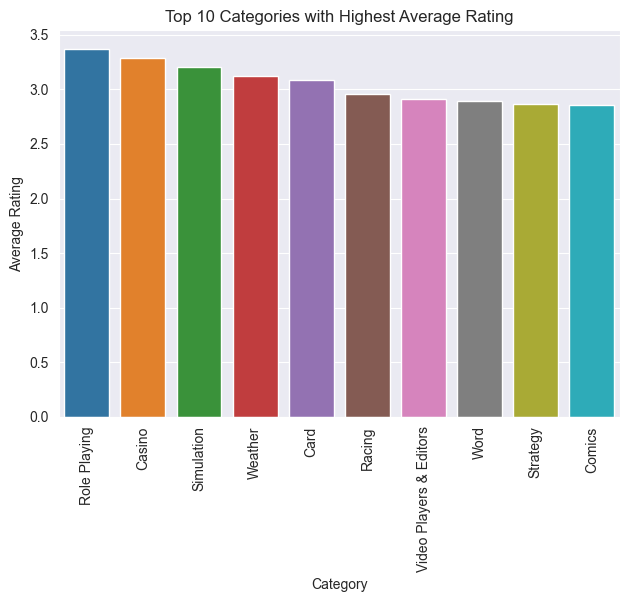

In [47]:
sns.barplot(data=high_rate_cats.head(10), x='Category', y='Rating', hue='Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.title('Top 10 Categories with Highest Average Rating')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

•	How does the distribution of app sizes vary across different categories?

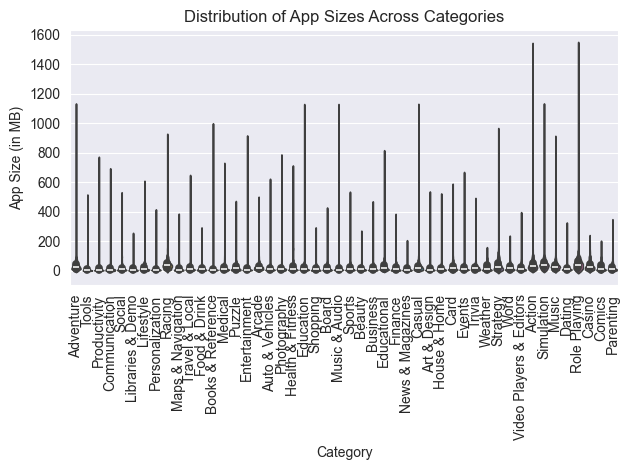

In [48]:
sns.violinplot(data=df, x='Category', y='Size', hue='Category')
plt.xlabel('Category')
plt.ylabel('App Size (in MB)')
plt.title('Distribution of App Sizes Across Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [49]:
""""" uncomment to see the distribution of app sizes for each categories
# Creating the FacetGrid
g = sns.FacetGrid(df, col='Category', col_wrap=4, height=4, sharex=False, sharey=False)

# Mapping the violinplot to each subplot
g.map(sns.violinplot, 'Size', palette='viridis')

# Adjusting the labels and title
g.set_titles(col_template="{col_name}")
g.set_axis_labels("App Size (in MB)", "")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of App Sizes Across Categories')

plt.show()
"""

'"" uncomment to see the distribution of app sizes for each categories\n# Creating the FacetGrid\ng = sns.FacetGrid(df, col=\'Category\', col_wrap=4, height=4, sharex=False, sharey=False)\n\n# Mapping the violinplot to each subplot\ng.map(sns.violinplot, \'Size\', palette=\'viridis\')\n\n# Adjusting the labels and title\ng.set_titles(col_template="{col_name}")\ng.set_axis_labels("App Size (in MB)", "")\ng.fig.subplots_adjust(top=0.9)\ng.fig.suptitle(\'Distribution of App Sizes Across Categories\')\n\nplt.show()\n'

•	Are there any trends in app releases over time within specific categories?

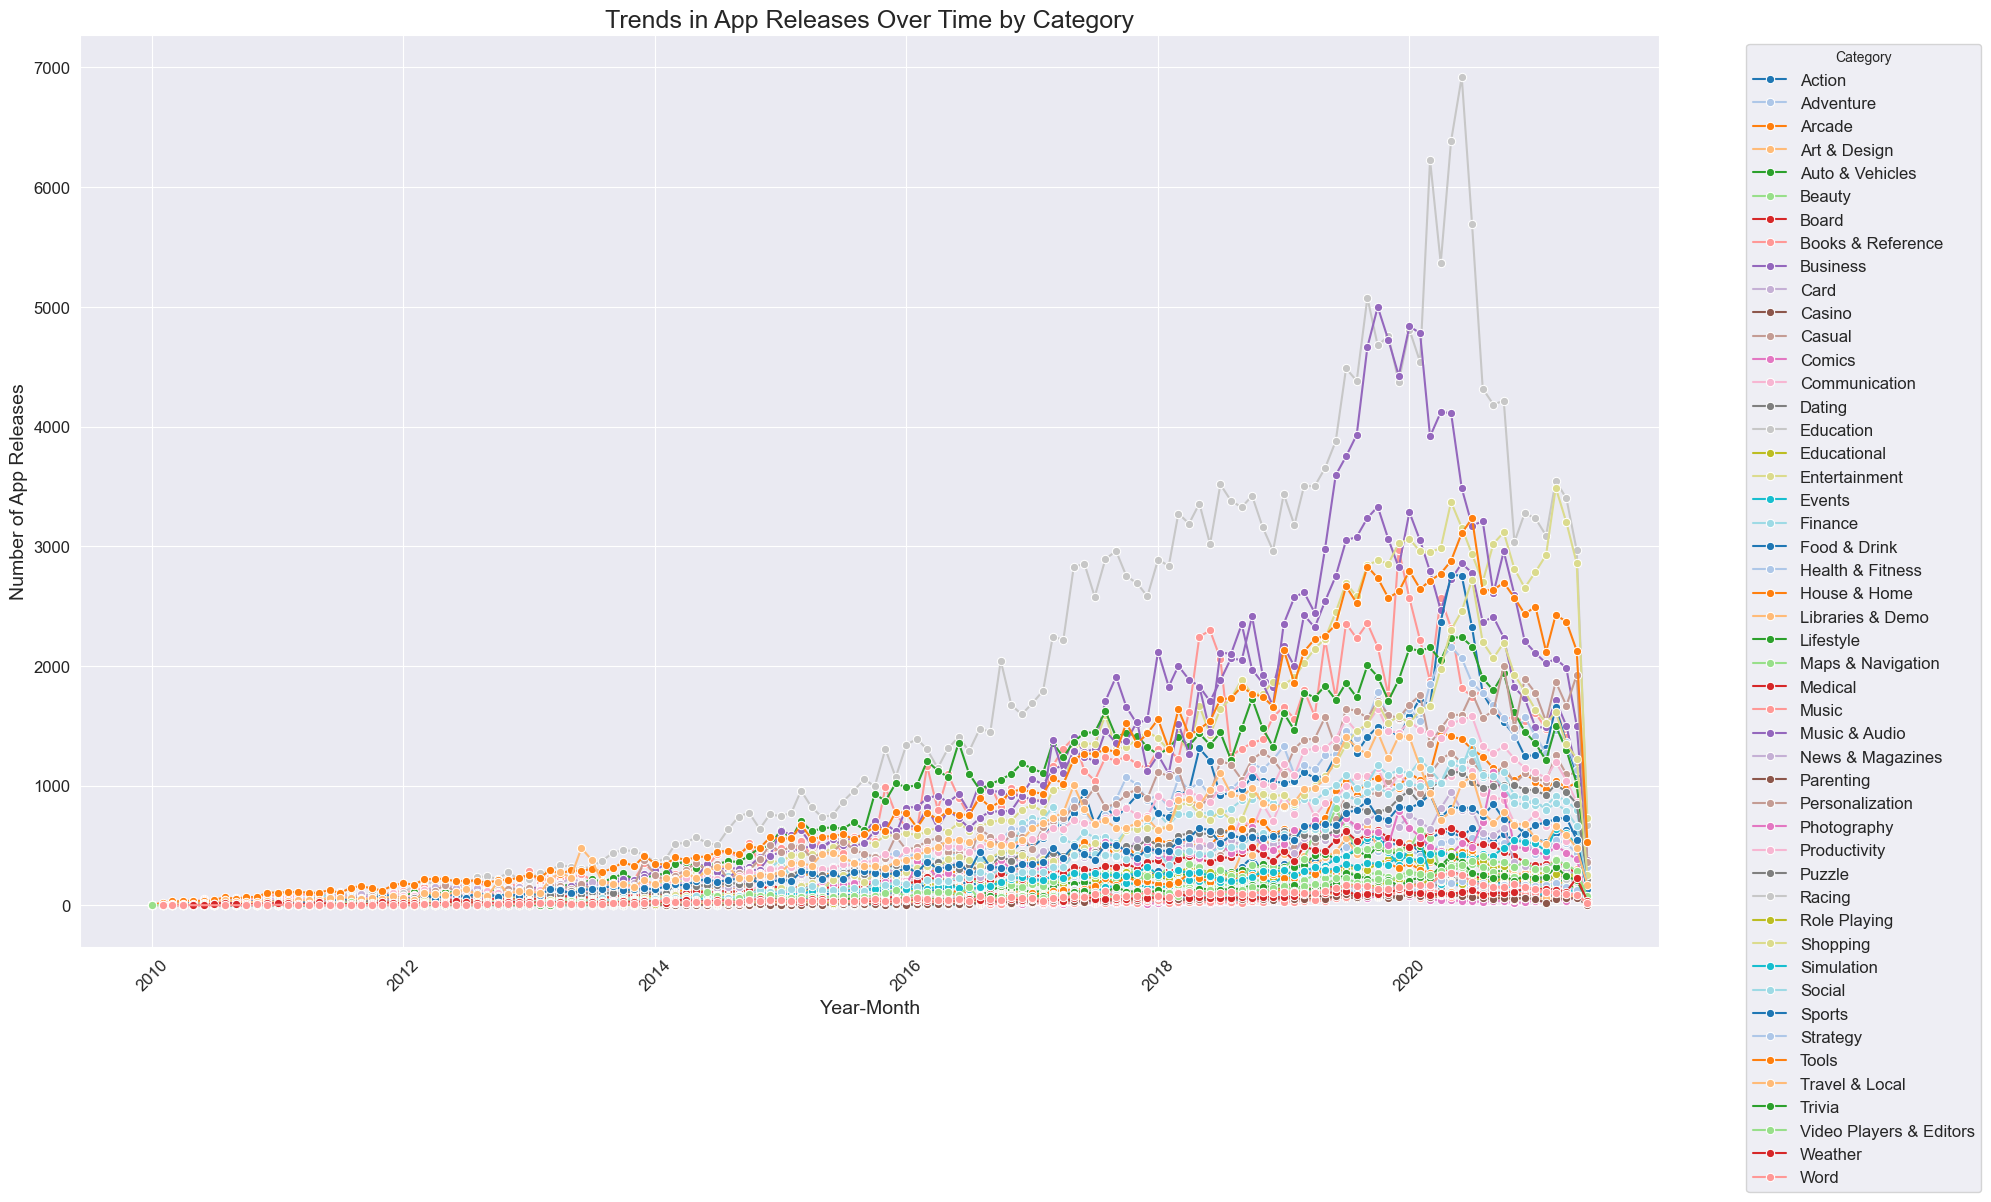

In [50]:
# Extract year and month from 'Released' column and convert to datetime for correct order
df['YearMonth'] = pd.to_datetime(df['Released'].dt.strftime('%Y-%m'))

# Group by 'Category' and 'YearMonth', count app releases
app_counts = df.groupby(['Category', 'YearMonth']).size().reset_index(name='Count')

# Create a larger figure with more space for the labels
plt.figure(figsize=(20, 12))

# Create a unique color palette with distinct colors
palette = sns.color_palette("tab20", len(df['Category'].unique()))

# Plotting trends in app releases over time within each category
sns.lineplot(x='YearMonth', y='Count', hue='Category', data=app_counts, palette=palette, marker='o')
plt.title('Trends in App Releases Over Time by Category', fontsize=18)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of App Releases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


In [51]:
""" uncomment to see the app releases over time for each categories
# Extract year and month from 'Released' column
df['YearMonth'] = df['Released'].dt.strftime('%Y-%m')

# Loop through each category and plot
categories = df['Category'].unique()

for category in categories:
    # Filter data for the current category
    cat_data = df[df['Category'] == category]
    
    # Group by 'YearMonth' and count app releases
    app_counts = cat_data.groupby('YearMonth').size().reset_index(name='Count')
    
    # Plotting trends in app releases over time for the current category
    plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
    sns.lineplot(x='YearMonth', y='Count', data=app_counts, marker='o')
    plt.title(f'Trends in App Releases Over Time for {category}')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of App Releases')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
"""

" uncomment to see the app releases over time for each categories\n# Extract year and month from 'Released' column\ndf['YearMonth'] = df['Released'].dt.strftime('%Y-%m')\n\n# Loop through each category and plot\ncategories = df['Category'].unique()\n\nfor category in categories:\n    # Filter data for the current category\n    cat_data = df[df['Category'] == category]\n    \n    # Group by 'YearMonth' and count app releases\n    app_counts = cat_data.groupby('YearMonth').size().reset_index(name='Count')\n    \n    # Plotting trends in app releases over time for the current category\n    plt.figure(figsize=(12, 4))  # Adjust the figure size as needed\n    sns.lineplot(x='YearMonth', y='Count', data=app_counts, marker='o')\n    plt.title(f'Trends in App Releases Over Time for {category}')\n    plt.xlabel('Year-Month')\n    plt.ylabel('Number of App Releases')\n    plt.xticks(rotation=90)\n    plt.tight_layout()\n    plt.show()\n"

User Engagement:
•	Is there a correlation between app ratings and the number of ratings?

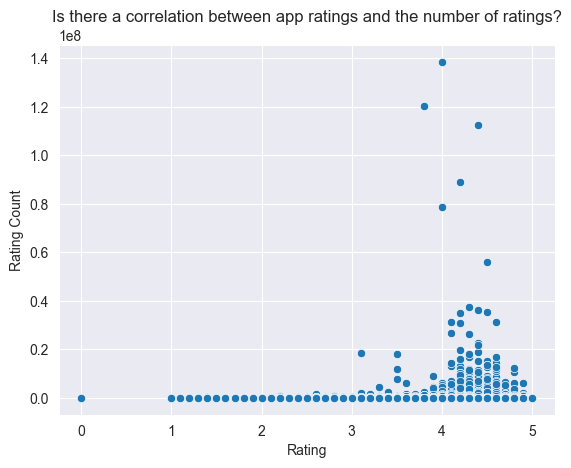

Correlation coefficient: 0.013622208204757591


In [52]:
# Plotting a scatter plot
sns.scatterplot(data=df, x='Rating', y='Rating Count')
plt.title('Is there a correlation between app ratings and the number of ratings?')
plt.show()

# Calculate correlation coefficient
correlation = df['Rating'].corr(df['Rating Count'])
print(f"Correlation coefficient: {correlation}")

A correlation coefficient close to 0 indicates that there is almost no linear relationship between app ratings and the number of ratings.

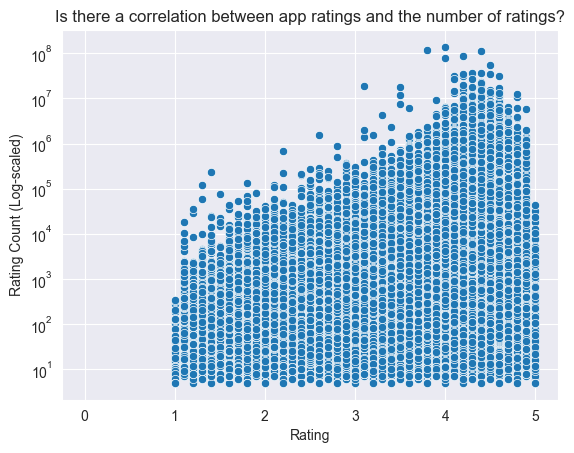

Correlation Coefficient (Log-scaled) between Rating and Rating Count: 0.7731


In [53]:
# Plotting a scatter plot
sns.scatterplot(data=df, x='Rating', y='Rating Count')
plt.title('Is there a correlation between app ratings and the number of ratings?')
plt.yscale('log')
plt.ylabel('Rating Count (Log-scaled)')
plt.show()

# Calculating the correlation coefficient with log-transformed Rating Count
df['Log_Rating_Count'] = np.log(df['Rating Count'] + 1)
df.dropna(subset=['Log_Rating_Count'], inplace=True)
correlation_coefficient_log = df['Rating'].corr(df['Log_Rating_Count'])
print(f"Correlation Coefficient (Log-scaled) between Rating and Rating Count: {correlation_coefficient_log:.4f}")

A value of 0.7712 suggests a strong positive linear relationship between 'Rating' and the logarithmically transformed 'Rating Count'. This means that as app ratings increase, the logarithmically scaled number of ratings tends to increase as well.

•	Are there differences in user engagement (Installs, ratings) between free and paid apps?

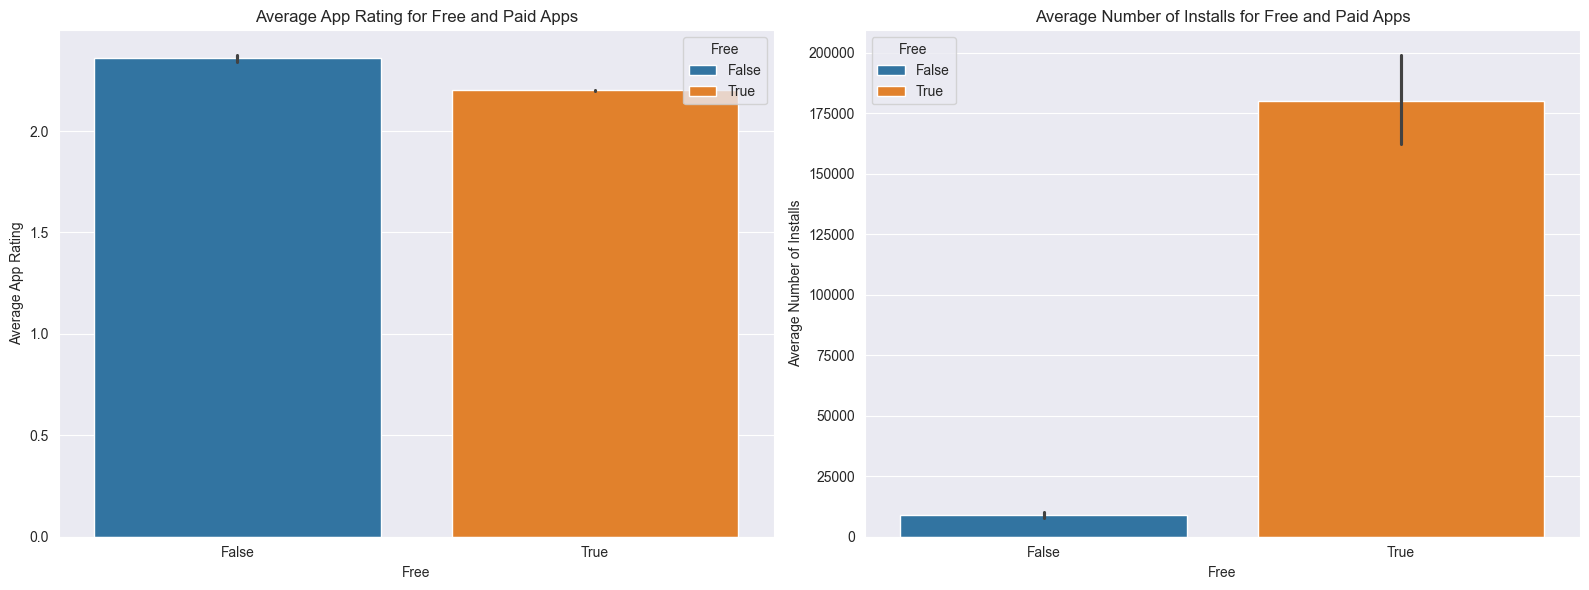

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average App Rating for free and paid apps
sns.barplot(data=df, x='Free', y='Rating', hue='Free', ax=axes[0])
axes[0].set_title('Average App Rating for Free and Paid Apps')
axes[0].set_ylabel('Average App Rating')

# Plot 2: Average Number of Installs for free and paid apps
sns.barplot(data=df, x='Free', y='Installs', hue='Free', ax=axes[1])
axes[1].set_title('Average Number of Installs for Free and Paid Apps')
axes[1].set_ylabel('Average Number of Installs')

# Display the plots
plt.tight_layout()
plt.show()

Free apps have significantly higher average installations compared to paid apps, although paid apps tend to have slightly higher average ratings.

Monetization and Market Strategy:
•	How do in-app purchases and ads (ad-supported) affect app ratings and user engagement?

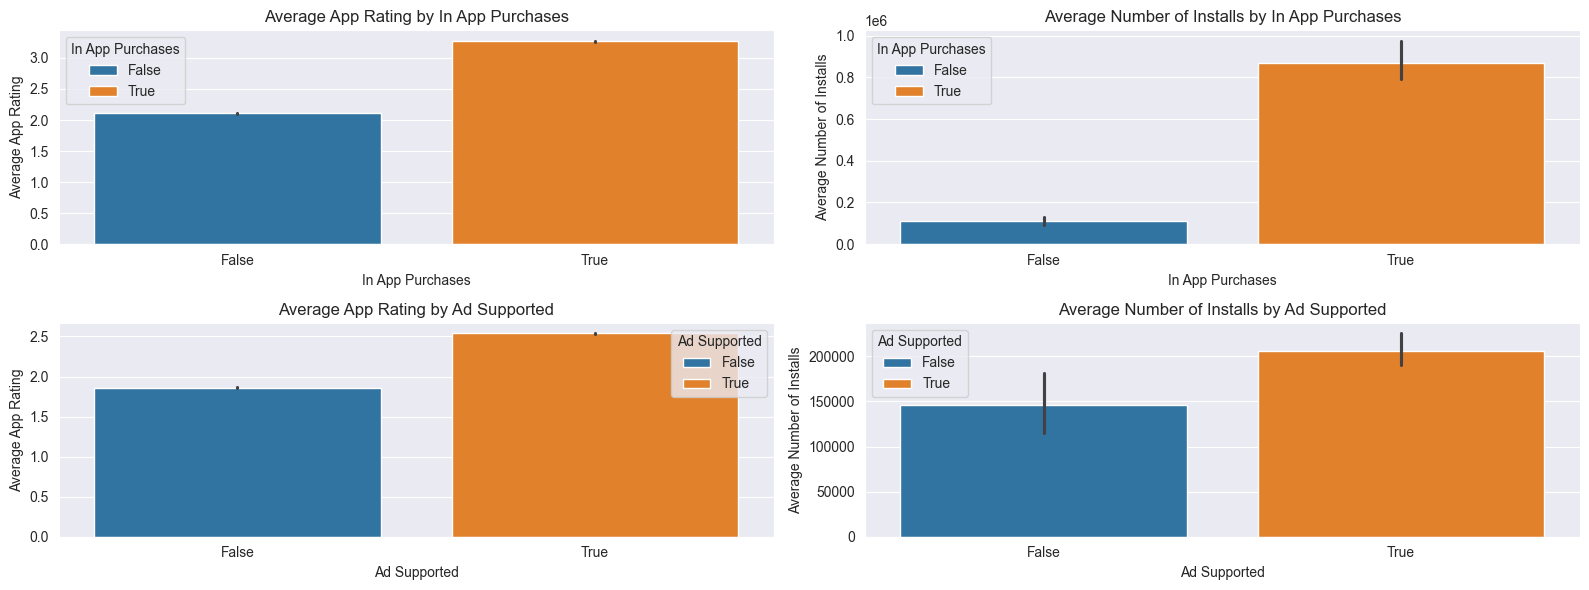

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(16, 6))

# Plot 1: Average App Rating by In App Purchases
sns.barplot(data=df, x='In App Purchases', y='Rating', hue='In App Purchases', ax=axes[0][0])
axes[0][0].set_title('Average App Rating by In App Purchases')
axes[0][0].set_ylabel('Average App Rating')

# Plot 2: Average Number of Installs by In App Purchases
sns.barplot(data=df, x='In App Purchases', y='Installs', hue='In App Purchases', ax=axes[0][1])
axes[0][1].set_title('Average Number of Installs by In App Purchases')
axes[0][1].set_ylabel('Average Number of Installs')

# Plot 3: Average App Rating by Ad-Supported
sns.barplot(data=df, x='Ad Supported', y='Rating', hue='Ad Supported', ax=axes[1][0])
axes[1][0].set_title('Average App Rating by Ad Supported')
axes[1][0].set_ylabel('Average App Rating')

# Plot 4: Average Number of Installs by Ad-Supported
sns.barplot(data=df, x='Ad Supported', y='Installs', hue='Ad Supported', ax=axes[1][1])
axes[1][1].set_title('Average Number of Installs by Ad Supported')
axes[1][1].set_ylabel('Average Number of Installs')
# Display the plots
plt.tight_layout()
plt.show()

Apps with in-app purchases or ad-supported features tend to have higher average ratings and a greater number of installs.

•	Are editor's choice apps more likely to have higher ratings or more installations?

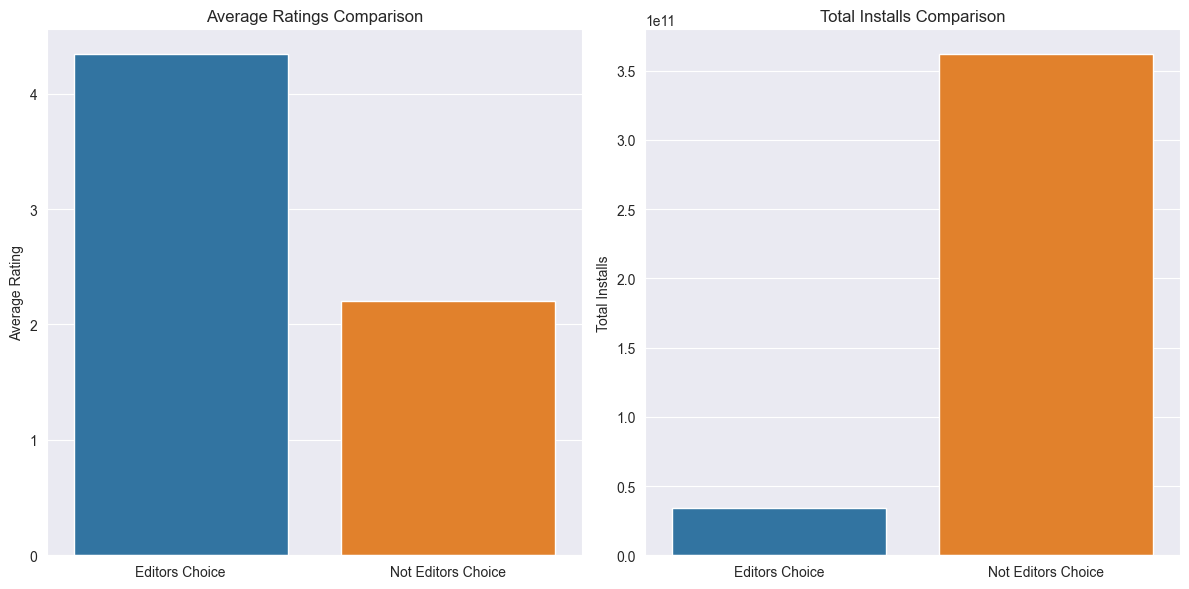

In [56]:
# Filter Editor's Choice and non-Editor's Choice apps
editors_choice = df[df['Editors Choice'] == True]
not_editors_choice = df[df['Editors Choice'] == False]

# Calculate average ratings
avg_rating_editors_choice = editors_choice['Rating'].mean()
avg_rating_not_editors_choice = not_editors_choice['Rating'].mean()

# Calculate total installations or average installations
total_installs_editors_choice = editors_choice['Installs'].sum()
total_installs_not_editors_choice = not_editors_choice['Installs'].sum()

# Visualize comparisons
plt.figure(figsize=(12, 6))

# Plotting average ratings
plt.subplot(1, 2, 1)
sns.barplot(x=['Editors Choice', 'Not Editors Choice'], y=[avg_rating_editors_choice, avg_rating_not_editors_choice], hue=['Editors Choice', 'Not Editors Choice'])
plt.title('Average Ratings Comparison')
plt.ylabel('Average Rating')

# Plotting total installations
plt.subplot(1, 2, 2)
sns.barplot(x=['Editors Choice', 'Not Editors Choice'], y=[total_installs_editors_choice, total_installs_not_editors_choice], hue=['Editors Choice', 'Not Editors Choice'])
plt.title('Total Installs Comparison')
plt.ylabel('Total Installs')

plt.tight_layout()
plt.show()


Editor's Choice apps have much higher average ratings but significantly fewer installations.

•	What is the distribution of app prices across different categories and how does it affect their popularity?

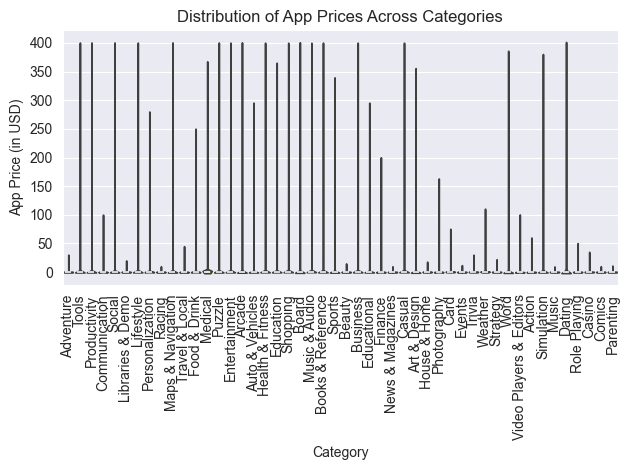

In [57]:
sns.violinplot(data=df[df['Currency'] == 'USD'], x='Category', y='Price', hue='Category')
plt.xlabel('Category')
plt.ylabel('App Price (in USD)')
plt.title('Distribution of App Prices Across Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
"""" uncomment to see the distribution of app prices for each categories
# Creating the FacetGrid
g = sns.FacetGrid(df[df['Currency'] == 'USD'], col='Category', col_wrap=4, height=4, sharex=False, sharey=False)

# Mapping the violinplot to each subplot
g.map(sns.violinplot, 'Price', palette='viridis')

# Adjusting the labels and title
g.set_titles(col_template='{col_name}')
g.set_axis_labels('App Price (USD)', '')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of App Prices Across Different Categories')
plt.show()
"""

'" uncomment to see the distribution of app prices for each categories\n# Creating the FacetGrid\ng = sns.FacetGrid(df[df[\'Currency\'] == \'USD\'], col=\'Category\', col_wrap=4, height=4, sharex=False, sharey=False)\n\n# Mapping the violinplot to each subplot\ng.map(sns.violinplot, \'Price\', palette=\'viridis\')\n\n# Adjusting the labels and title\ng.set_titles(col_template=\'{col_name}\')\ng.set_axis_labels(\'App Price (USD)\', \'\')\ng.fig.subplots_adjust(top=0.9)\ng.fig.suptitle(\'Distribution of App Prices Across Different Categories\')\nplt.show()\n'

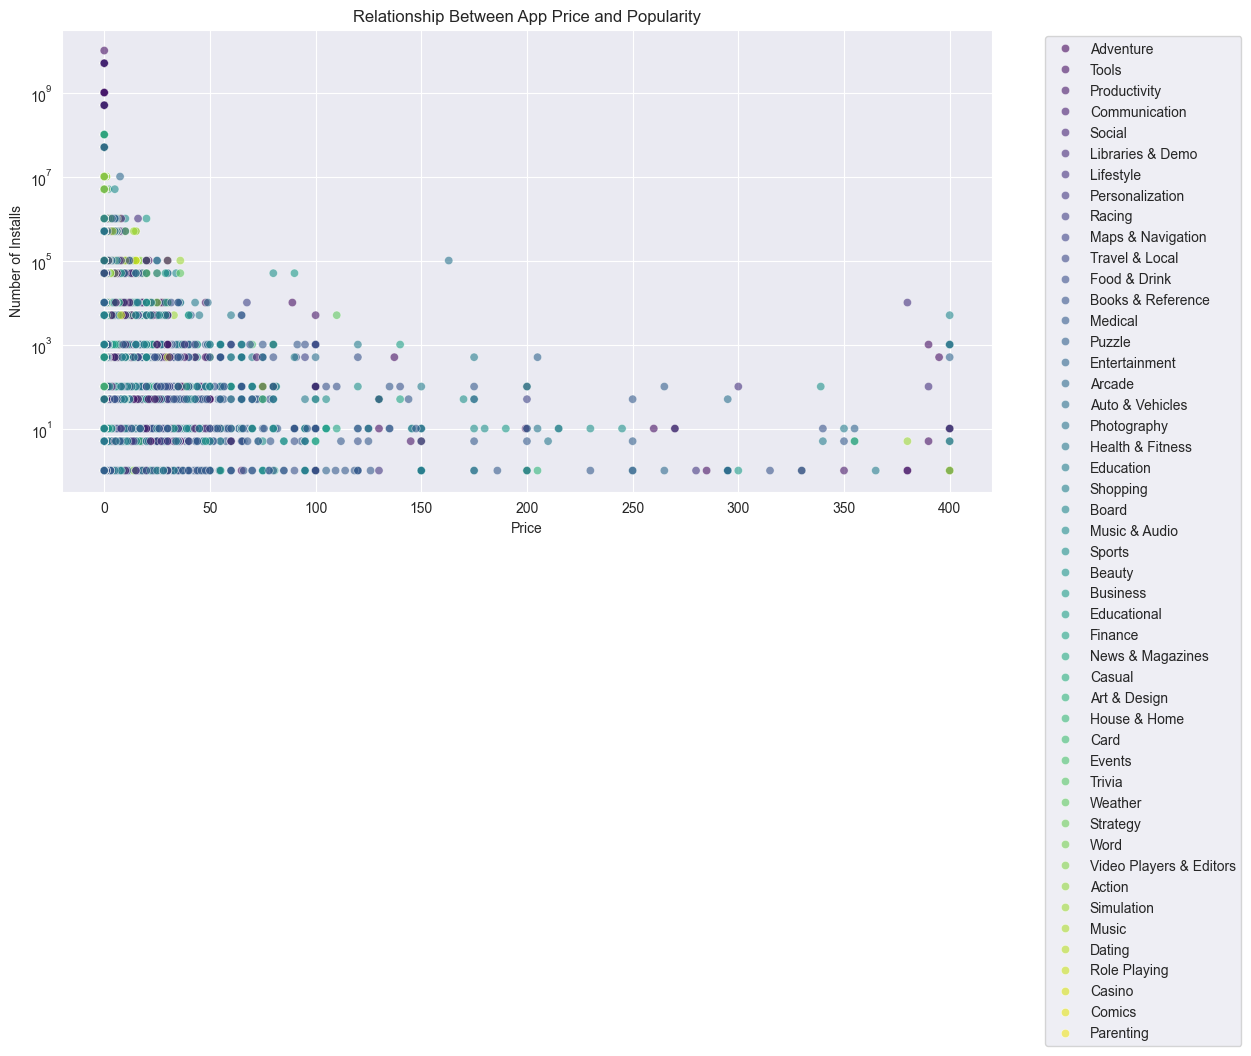

In [59]:
# Analyzing how app prices affect popularity (installations)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price', y='Installs', hue='Category', palette='viridis', alpha=0.6)
plt.title('Relationship Between App Price and Popularity')
plt.xlabel('Price')
plt.ylabel('Number of Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.show()

In [60]:
# Calculate correlation coefficient
correlation_coefficient = np.log(df['Installs'] + 1).corr(np.log(df['Price'] + 1))
print(f"Correlation Coefficient between log Installs and log Price: {correlation_coefficient}")

Correlation Coefficient between log Installs and log Price: -0.047466424995676174


Despite the correlation coefficient indicating a weak negative correlation between log-transformed installations and log-transformed prices, visual observation from the plot shows a clear trend: Higher app prices generally lead to fewer installations.
